In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
#Load MNIST datasets from Keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#Rescale the images from [0, 255] to the [0.0, 1.0] range.
train_images, test_images = train_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

In [3]:
train_filter1 = np.where((train_labels == 0 ))
test_filter1 = np.where((test_labels == 0 ))

In [4]:
train_filter2 = np.where((train_labels == 1 ))
test_filter2 = np.where((test_labels == 1 ))

In [5]:
train_images1, train_labels1 = train_images[train_filter1], train_labels[train_filter1]
test_images1, test_labels1 = test_images[test_filter1], test_labels[test_filter1]

In [6]:
train_images2, train_labels2 = train_images[train_filter2], train_labels[train_filter2]
test_images2, test_labels2 = test_images[test_filter2], test_labels[test_filter2]

In [7]:
train_filter_tf = np.where((train_labels == 0 ) | (train_labels == 1 ))
test_filter_tf = np.where((test_labels == 0 ) | (test_labels == 1 ))

In [8]:
train_images_tf, train_labels_tf = train_images[train_filter_tf], train_labels[train_filter_tf]
test_images_tf, test_labels_tf = test_images[test_filter_tf], test_labels[test_filter_tf]

In [9]:
train_images_tf.shape

(12665, 28, 28, 1)

In [10]:
len(train_labels_tf)

12665

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images_tf, train_labels_tf, epochs=10)

Epoch 1/10
396/396 [==============================] - 2s 6ms/step - loss: 0.3217 - accuracy: 0.9968
Epoch 2/10
396/396 [==============================] - 2s 6ms/step - loss: 0.3144 - accuracy: 0.9988
Epoch 3/10
396/396 [==============================] - 2s 6ms/step - loss: 0.3144 - accuracy: 0.9989
Epoch 4/10
396/396 [==============================] - 2s 6ms/step - loss: 0.3140 - accuracy: 0.9993
Epoch 5/10
396/396 [==============================] - 3s 7ms/step - loss: 0.3139 - accuracy: 0.9994
Epoch 6/10
396/396 [==============================] - 3s 7ms/step - loss: 0.3144 - accuracy: 0.9987
Epoch 7/10
396/396 [==============================] - 3s 7ms/step - loss: 0.3140 - accuracy: 0.9993
Epoch 8/10
396/396 [==============================] - 3s 7ms/step - loss: 0.3140 - accuracy: 0.9992
Epoch 9/10
396/396 [==============================] - 3s 7ms/step - loss: 0.3138 - accuracy: 0.9995
Epoch 10/10
396/396 [==============================] - 3s 7ms/step - loss: 0.3136 - accuracy: 0.9996

In [15]:
extractor = keras.Model(inputs=model.inputs,
                        outputs=[layer.output for layer in model.layers])
features1 = extractor(train_images1)
features2 = extractor(train_images2)

In [16]:
features1[6]

<tf.Tensor: shape=(5923, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [17]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pennylane as qml
from pennylane import numpy as np
from pennylane import RX, RY, RZ, CNOT

In [18]:
def feature_encoding_hamiltonian(features, wires):

    for idx, w in enumerate(wires):
        RX(features[idx], wires=w)

def ising_hamiltonian(weights, wires, l):

        # ZZ coupling
        CNOT(wires=[wires[1], wires[0]])
        RZ(weights[l, 0], wires=wires[0])
        CNOT(wires=[wires[1], wires[0]])
        # local fields
        for idx, w in enumerate(wires):
            RY(weights[l, idx + 1], wires=w)

def QAOAEmbedding(features, weights, wires):

    repeat = len(weights)
    for l in range(repeat):
        # apply alternating Hamiltonians
        feature_encoding_hamiltonian(features, wires)
        ising_hamiltonian(weights, wires, l)
    # repeat the feature encoding once more at the end
    feature_encoding_hamiltonian(features, wires)

In [19]:
n_features = 2
n_qubits = 2 * n_features + 1

dev = qml.device("default.qubit", wires=n_qubits)

In [20]:
@qml.qnode(dev)
def swap_test(q_weights, x1, x2):

    # load the two inputs into two different registers
    QAOAEmbedding(features=x1, weights=q_weights, wires=[1, 2])
    QAOAEmbedding(features=x2, weights=q_weights, wires=[3, 4])

    # perform the SWAP test
    qml.Hadamard(wires=0)
    for k in range(n_features):
        qml.CSWAP(wires=[0, k + 1, 2 + k + 1])
    qml.Hadamard(wires=0)

    return qml.expval(qml.PauliZ(0))

In [21]:
def overlaps(weights, X1=None, X2=None):

    linear_layer = weights[0]
    q_weights = weights[1]

    overlap = 0
    for x1 in X1:
        for x2 in X2:
            # multiply the inputs with the linear layer weight matrix
            w_x1 = linear_layer @ x1
            w_x2 = linear_layer @ x2
            # overlap of embedded intermediate features
            overlap += swap_test(q_weights, w_x1, w_x2)

    mean_overlap = overlap / (len(X1) * len(X2))
    return mean_overlap

In [22]:
def cost(weights, A=None, B=None):

    aa = overlaps(weights, X1=A, X2=A)
    bb = overlaps(weights, X1=B, X2=B)
    ab = overlaps(weights, X1=A, X2=B)

    d_hs = -2 * ab + (aa + bb)

    return 1 - 0.5 * d_hs

In [23]:
# generate initial parameters for circuit
init_pars_quantum = np.random.normal(loc=0, scale=0.1, size=(4, 3))

# generate initial parameters for linear layer
init_pars_classical = np.random.normal(loc=0, scale=0.1, size=(2, 10))

init_pars = [init_pars_classical, init_pars_quantum]

In [24]:
from tensorflow import compat

In [25]:
tf.compat.v1.enable_eager_execution()

In [26]:
x1 = tf.constant(features1[6])
x2 = tf.constant(features2[6])

In [27]:
A = np.array(x1)
B = np.array(x2)

In [28]:
A[50]

tensor([ 0.      ,  0.      ,  0.      , 15.859566, 24.533138,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ], dtype=float32, requires_grad=True)

In [29]:
A = A[:100]
B = B[:100]

In [30]:
optimizer = qml.RMSPropOptimizer(stepsize=0.01)
batch_size = 10
pars = init_pars

for i in range(1000):

    # Sample a batch of training inputs from each class
    selectA = np.random.choice(range(len(A)), size=(batch_size,), replace=True)
    selectB = np.random.choice(range(len(B)), size=(batch_size,), replace=True)

    A_batch = [A[s] for s in selectA]
    B_batch = [B[s] for s in selectB]
    # Walk one optimization step
    pars = optimizer.step(lambda w: cost(w, A=A_batch, B=B_batch), pars)
    print("Step", i, "done.")

    #Print the validation cost every 10 steps
    #if i % 5 == 0 and i != 0:
        #cst = cost(pars, A=A_val, B=B_val)
        #print("Cost on validation set {:2f}".format(cst))

Step 0 done.
Step 1 done.
Step 2 done.
Step 3 done.
Step 4 done.
Step 5 done.
Step 6 done.
Step 7 done.
Step 8 done.
Step 9 done.
Step 10 done.
Step 11 done.
Step 12 done.
Step 13 done.
Step 14 done.
Step 15 done.
Step 16 done.
Step 17 done.
Step 18 done.
Step 19 done.
Step 20 done.
Step 21 done.
Step 22 done.
Step 23 done.
Step 24 done.
Step 25 done.
Step 26 done.
Step 27 done.
Step 28 done.
Step 29 done.
Step 30 done.
Step 31 done.
Step 32 done.
Step 33 done.
Step 34 done.
Step 35 done.
Step 36 done.
Step 37 done.
Step 38 done.
Step 39 done.
Step 40 done.
Step 41 done.
Step 42 done.
Step 43 done.
Step 44 done.
Step 45 done.
Step 46 done.
Step 47 done.
Step 48 done.
Step 49 done.
Step 50 done.
Step 51 done.
Step 52 done.
Step 53 done.
Step 54 done.
Step 55 done.
Step 56 done.
Step 57 done.
Step 58 done.
Step 59 done.
Step 60 done.
Step 61 done.
Step 62 done.
Step 63 done.
Step 64 done.
Step 65 done.
Step 66 done.
Step 67 done.
Step 68 done.
Step 69 done.
Step 70 done.
Step 71 done.
St

Step 554 done.
Step 555 done.
Step 556 done.
Step 557 done.
Step 558 done.
Step 559 done.
Step 560 done.
Step 561 done.
Step 562 done.
Step 563 done.
Step 564 done.
Step 565 done.
Step 566 done.
Step 567 done.
Step 568 done.
Step 569 done.
Step 570 done.
Step 571 done.
Step 572 done.
Step 573 done.
Step 574 done.
Step 575 done.
Step 576 done.
Step 577 done.
Step 578 done.
Step 579 done.
Step 580 done.
Step 581 done.
Step 582 done.
Step 583 done.
Step 584 done.
Step 585 done.
Step 586 done.
Step 587 done.
Step 588 done.
Step 589 done.
Step 590 done.
Step 591 done.
Step 592 done.
Step 593 done.
Step 594 done.
Step 595 done.
Step 596 done.
Step 597 done.
Step 598 done.
Step 599 done.
Step 600 done.
Step 601 done.
Step 602 done.
Step 603 done.
Step 604 done.
Step 605 done.
Step 606 done.
Step 607 done.
Step 608 done.
Step 609 done.
Step 610 done.
Step 611 done.
Step 612 done.
Step 613 done.
Step 614 done.
Step 615 done.
Step 616 done.
Step 617 done.
Step 618 done.
Step 619 done.
Step 620 d

In [31]:
print(init_pars)

[tensor([[ 0.32698015, -0.05885422,  0.0386129 ,  0.1646155 ,  0.02108314,
          0.09967383,  0.1678753 ,  0.05325693, -0.01401635, -0.00371889],
        [ 0.05370451,  0.17898644, -0.24474259, -0.01489377,  0.06879555,
          0.05641679, -0.10543687, -0.01171742, -0.11259778, -0.04940767]], requires_grad=True), tensor([[ 0.04177647, -0.06413677, -0.08745547],
        [-0.03601646, -0.15661606, -0.0875089 ],
        [ 0.048262  ,  0.03252971, -0.12396734],
        [ 0.09672144,  0.14616463, -0.13530964]], requires_grad=True)]


In [32]:
print(pars)

[array([[ 0.66418844,  0.27547537,  0.0386129 ,  0.06790254,  0.02931157,
         0.3448764 ,  0.47884286,  0.05325693,  0.33173689, -0.00371889],
       [ 0.07091396,  0.02649488, -0.24474259, -0.00283014, -0.00422329,
        -0.1105382 ,  0.19652742, -0.01171742, -0.08570695, -0.04940767]]), array([[-1.80301901e-02, -3.58010217e-01, -2.58666830e+00],
       [-5.08250694e-03, -3.15310952e+00, -8.27809349e-01],
       [ 4.64118448e-04,  3.80127521e-01,  7.49103989e-01],
       [ 5.40950716e-02, -1.57351367e+00,  7.69990768e-01]])]


In [59]:
pars[1]

array([[-1.80301901e-02, -3.58010217e-01, -2.58666830e+00],
       [-5.08250694e-03, -3.15310952e+00, -8.27809349e-01],
       [ 4.64118448e-04,  3.80127521e-01,  7.49103989e-01],
       [ 5.40950716e-02, -1.57351367e+00,  7.69990768e-01]])

In [45]:
select = 100
A_B = np.r_[A[:select], B[:select]]

In [46]:
cost_train = cost(pars, A=A[:select], B=B[:select])
#cost_val = cost(pars, A=A_val[:select], B=B_val[:select])
print("Cost for pretrained parameters on training set:", cost_train)
#print("Cost for pretrained parameters on validation set:", cost_val)

Cost for pretrained parameters on training set: 0.025265845488892213


In [47]:
cost_train1 = cost(init_pars, A=A[:select], B=B[:select])
print(cost_train1)

0.9793921115983912


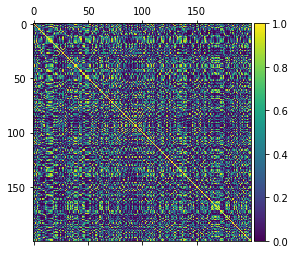

In [48]:
gram_before = [[overlaps(init_pars, X1=[x1], X2=[x2]) for x1 in A_B] for x2 in A_B]

ax = plt.subplot(111)
im = ax.matshow(gram_before, vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

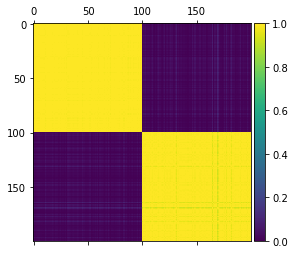

In [49]:
gram_after = [[overlaps(pars, X1=[x1], X2=[x2]) for x1 in A_B] for x2 in A_B]

ax = plt.subplot(111)
im = ax.matshow(gram_after, vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

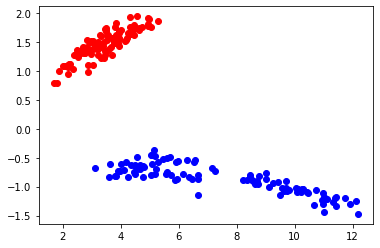

In [38]:
for a in A:
    intermediate_a = init_pars[0] @ a
    plt.scatter(intermediate_a[:][0], intermediate_a[:][1], c="red")

for b in B:
    intermediate_b = init_pars[0] @ b
    plt.scatter(intermediate_b[:][0], intermediate_b[:][1], c="blue")

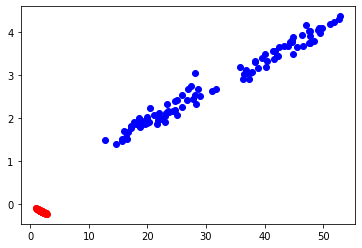

In [39]:
for a in A:
    intermediate_a = pars[0] @ a
    plt.scatter(intermediate_a[:][0], intermediate_a[:][1], c="red")

for b in B:
    intermediate_b = pars[0] @ b
    plt.scatter(intermediate_b[:][0], intermediate_b[:][1], c="blue")

In [91]:
x1 = pars[0] @ A[2]
print(x1)

[ 1.65872757 -0.14002842]


In [92]:
pars[1][0]

array([-0.01803019, -0.35801022, -2.5866683 ])